In [5]:
import pandas as pd

train = pd.read_csv(filepath_or_buffer='house-prices-advanced-regression-techniques/train.csv')

test = pd.read_csv(filepath_or_buffer='house-prices-advanced-regression-techniques/test.csv')

print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (1460, 81)
test shape: (1459, 80)


In [1]:
ls

chapter02.ipynb
chapter03.ipynb
house-prices-advanced-regression-techniques/
titanic/


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

       price  log(price + 1)
0     208500       12.247699
1     181500       12.109016
2     223500       12.317171
3     140000       11.849405
4     250000       12.429220
...      ...             ...
1455  175000       12.072547
1456  210000       12.254868
1457  266500       12.493133
1458  142125       11.864469
1459  147500       11.901590

[1460 rows x 2 columns] 

price skew    : 1.880940746034036
log(price+1)    skew: 0.12122191311528359


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a4cf3c8>,
      dtype=object)

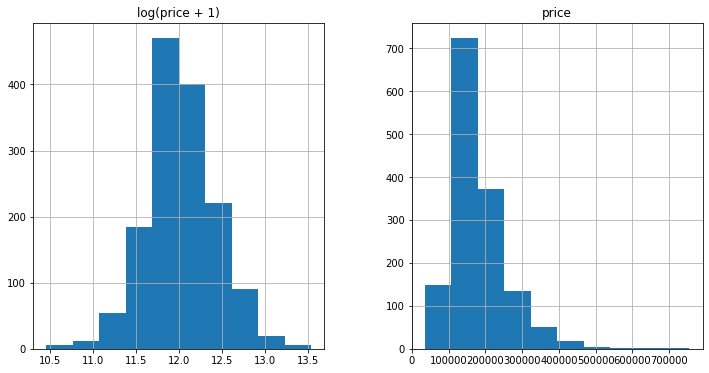

In [11]:
%matplotlib inline

# 販売価格を対数変換して正規分布させる
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# SalePriceについて底をeとするa+1の対数に変換し元の値と共にデータフレームに登録
prices = pd.DataFrame({'price':train['SalePrice'],
                        'log(price + 1)':np.log1p(train['SalePrice'])})

print(prices, '\n')

# 'price'の対数変換前後の歪度を出力
print('price skew    :', skew(prices['price']))
print('log(price+1)    skew:', skew(prices['log(price + 1)']))

# 'SalePrice'の変換前と変換後をヒストグラムにする
# プロット図のサイズを設定
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices.hist()

In [12]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [13]:
all_data = pd.concat((train.loc[:, 'MSSubClass':'SaleCondition'],
                      test.loc[:, 'MSSubClass':'SaleCondition']))

# 連結したデータを出力
print(all_data.shape)
print(all_data)

(2919, 79)
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    In

In [14]:
# 数値型のカラムで歪度が0.75を超える場合は対数変換する
from scipy.stats import skew

# object型ではないカラムのインデックスを取得
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print('-----Column of non-object type-----')
print(numeric_feats)

-----Column of non-object type-----
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [15]:
# object型ではないカラムの歪度を、欠損値をのぞいてから求める
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))

print('-----Skewness of non-object type column-----')
print(skewed_feats)

-----Skewness of non-object type column-----
MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold    

In [16]:
# 歪度が0.75より大きいカラムのみをskewd_featsに再代入
skewed_feats = skewed_feats[skewed_feats > 0.75]

print('-----Skewness greater than > 0.75')
print(skewed_feats)

-----Skewness greater than > 0.75
MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
dtype: float64


In [17]:
# 抽出したカラムのインデックスを取得
skewed_feats = skewed_feats.index

# 歪度が0.75より大きいカラムの値を対数変換する
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data[skewed_feats] # 歪度が0.75より大きいカラムの対数変換後を出力

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,...,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,...,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,...,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,...,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,...,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1455,5.081404,3.091042,7.546974,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000
1456,3.044522,5.081404,9.903538,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,...,7.110696,0.000000,0.693147,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000
1457,4.454347,4.143135,9.253591,0.000000,5.823046,0.0,6.356108,6.816736,6.878326,0.000000,...,6.878326,0.693147,0.693147,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508


In [18]:
# カテゴリカルなデータを情報表現に変換する
cc_data = pd.get_dummies(train['LotShape'])

# 元の'LotShape'を追加
cc_data['LotShape'] = train['LotShape']

# 20レコードを出力
cc_data[:20]

,IR1,IR2,IR3,Reg,LotShape
0,0,0,0,1,Reg
1,0,0,0,1,Reg
2,1,0,0,0,IR1
3,1,0,0,0,IR1
4,1,0,0,0,IR1
5,1,0,0,0,IR1
6,0,0,0,1,Reg
7,1,0,0,0,IR1
8,0,0,0,1,Reg
9,0,0,0,1,Reg


In [19]:
# カテゴリカルなカラムを情報表現に変換
all_data = pd.get_dummies(all_data)

In [20]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
# 欠損値をデータの平均値に置き換える
all_data = all_data.fillna(all_data[:train.shape[0]].mean())

In [22]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
# リッジ回帰モデル
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [24]:
# 二乗平均平方根誤差を計算する関数を定義する
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    # クロスバリデーションによる二乗平均平方根誤差の取得
    rmse = np.sqrt( -cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", # 平均二乗誤差
                                        cv = 5))
    return(rmse)

In [25]:
# リッジ回帰モデルで学習する
from sklearn.linear_model import Ridge

# リッジ回帰モデルを生成
model_ridge = Ridge()

# L2正則化の強度を10パターン用意
alphas = [0.05, 0.1, 0.5, 1, 10, 15, 30, 50, 75]

# 正則化の各強度でリッジ回帰を実行
# 5分割のクロスバリデーションでRMSEを求め、その平均を取得
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas ]

# cv_ridgeをSeriesオブジェクトに変換
cv_ridge = pd.Series(cv_ridge, index=alphas)

# スコアを出力
print('Ridge RMSE loss Mean:')
print(cv_ridge.mean())

Ridge RMSE loss Mean:
0.13216916795339834


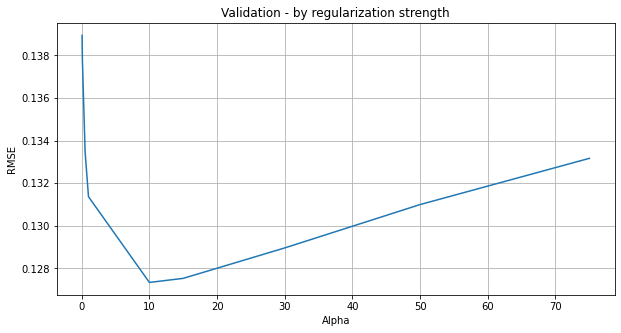

In [26]:
# 正則化の強度別のスコアをグラフにする
plt.figure(figsize=(10, 5)) # 描画エリアのサイズ
plt.plot(cv_ridge) # cv_ridgeをプロット
plt.grid() # グリッド表示
plt.title('Validation - by regularization strength')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()

In [27]:
# ラッソ回帰で学習する
from sklearn.linear_model import LassoCV

# ラッソ回帰モデルで推定する
# L1正則化項を4パターンで試す
model_lasso = LassoCV(
                        alphas = [1, 0.1, 0.001, 0.0005]
                      ).fit(X_train, y)

print('Lasso regression RMSE loss')
print(rmse_cv(model_lasso))

Lasso regression RMSE loss
[0.10330995 0.13147299 0.12552458 0.10530461 0.14723333]


In [28]:
print('Average loss:', rmse_cv(model_lasso).mean())
print('Minimum loss:', rmse_cv(model_lasso).min())
print('Best alpha    :', model_lasso.alpha_)

Average loss: 0.12256909294467004
Minimum loss: 0.1033099507189644
Best alpha    : 0.0005


In [29]:
# GBDT
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)

# 決定木の深さ3、学習率0.1
params = {"max_depth":3, "eta":0.1}

# xgboostモデルでクロスバリデーションを実行
cross_val = xgb.cv(
                    params,
                    dtrain,
                    num_boost_round=1000,
                    early_stopping_rounds=50
                    )

cross_val

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.380518,0.003150,10.380511,0.007227
1,9.345149,0.002916,9.345143,0.007586
2,8.413390,0.002712,8.413386,0.007924
3,7.574888,0.002511,7.575220,0.007950
4,6.820174,0.002321,6.820488,0.007688
...,...,...,...,...
405,0.040728,0.000315,0.125469,0.013440
406,0.040664,0.000320,0.125464,0.013418
407,0.040607,0.000326,0.125434,0.013416
408,0.040534,0.000332,0.125432,0.013409


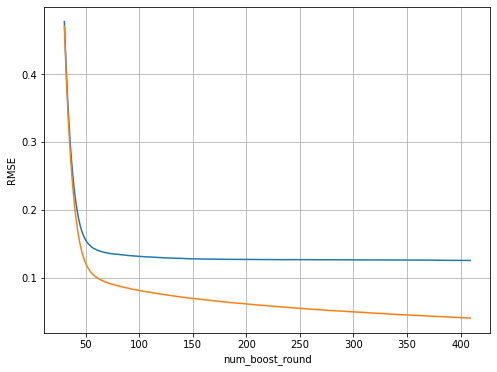

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(cross_val.loc[30:, ["test-rmse-mean", "train-rmse-mean"]])
plt.grid()
plt.xlabel('num_boost_round')
plt.ylabel('RMSE')
plt.show()

In [31]:
# XGBoostで学習する
model_xgb = xgb.XGBRegressor(
                                n_estimators=410,
                                max_depth=3,
                                learning_rate=0.1
                            )

model_xgb.fit(X_train, y)

print('xgboost RMSE loss:')
print(rmse_cv(model_xgb).mean())

[17:29:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost RMSE loss:
[17:30:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.12437590381245056


In [32]:
# ラッソ回帰と GBDTで予測する
lasso_preds = np.expm1(model_lasso.predict(X_test))
xgb_preds = np.expm1(model_xgb.predict(X_test))

In [33]:
# アンサンブルする
preds = lasso_preds*0.7 + xgb_preds*0.3

In [34]:

preds

array([121573.64716667, 153387.33373512, 182805.267147  , ...,
       164630.53727481, 117468.8555032 , 227594.89562692])